In [25]:
import pandas as pd
import numpy as np
import re
import geopandas as gpd
import matplotlib.pyplot as plt

#### **VENDORS REGISTRY**

In [26]:
vendors = pd.read_csv('can-summer-2023/data/raw/vendors/illinois_state_vendor_registry_as_of_20230614.csv', encoding='cp1252',
                    dtype=str)

vendors = vendors[['Company Name',
 'Address',
 'City',
 'State',
 'Zip',
]]
vendors.head()

,Company Name,Address,City,State,Zip
0,"'D' CONSTRUCTION, INC.",1488 SOUTH BROADWAY,COAL CITY,IL,\t60416
1,#1 Professional Cleaning Services,2205 Mayfair,Westchester,IL,\t60154
2,"*PRADO & RENTERIA CPAS, Prof. Corp.",1837 South Michigan Avenue,Chicago,IL,\t60616
3,"@Veterans Construction Group, LLC.",2608 W 25th St,Chicago,IL,\t60608
4,0x Global LLC,"6177 N Lincoln Ave, Suite 306",Chicago,IL,\t60659


In [27]:
#Check for missing values in company name
print('Missing number of vendors:', vendors[vendors['Company Name'].isna()].shape[0])
#Only keep rows that have a company name
vendors = vendors[~vendors['Company Name'].isna()].reset_index(drop=True)

Missing number of vendors: 2


In [28]:
#Cleaning the company name: removing numbers, punctuation and special characters
vendors['clean_name_vendor'] = np.nan

for i in range(vendors.shape[0]):
    vendors.loc[i, 'clean_name_vendor'] = re.sub('[^A-Za-z]+', '', vendors.loc[i, 'Company Name']).lower()

In [29]:
vendors[['Company Name', 'clean_name_vendor']]

,Company Name,clean_name_vendor
0,"'D' CONSTRUCTION, INC.",dconstructioninc
1,#1 Professional Cleaning Services,professionalcleaningservices
2,"*PRADO & RENTERIA CPAS, Prof. Corp.",pradorenteriacpasprofcorp
3,"@Veterans Construction Group, LLC.",veteransconstructiongroupllc
4,0x Global LLC,xgloballlc
...,...,...
3538,ZOI Incorporated,zoiincorporated
3539,"Zonatherm Products, Inc.",zonathermproductsinc
3540,Zuber Lawler LLP,zuberlawlerllp
3541,"Zuriel Medical Staffing, Inc.",zurielmedicalstaffinginc


#### **AWARDED CONTRACTS**

In [30]:
contracts = pd.read_csv('can-summer-2023/data/raw/contracts/illinois_bidbuy_contracts_as_of_20230614.csv')
contracts.head()

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024


In [31]:
#Check for missing values in vendors
print('Missing number of vendors:', contracts[contracts['Vendor'].isna()].shape[0])

Missing number of vendors: 0


In [32]:
#Cleaning the company name: removing numbers, punctuation and special characters
contracts['clean_name_contr'] = np.nan

for i in range(contracts.shape[0]):
    contracts.loc[i, 'clean_name_contr'] = re.sub('[^A-Za-z]+', '', contracts.loc[i, 'Vendor']).lower()

In [33]:
contracts[['Vendor', 'clean_name_contr']]

,Vendor,clean_name_contr
0,"CaremarkPCS Health, L.L.C.",caremarkpcshealthllc
1,"ConnectYourCare, LLC",connectyourcarellc
2,WCRI,wcri
3,"Ebix, Inc.",ebixinc
4,FOLEY & LARDNER LLP,foleylardnerllp
...,...,...
1371,Midland Paper,midlandpaper
1372,WEX BANK,wexbank
1373,"Change Healthcare Pharmacy Solutions, Inc.",changehealthcarepharmacysolutionsinc
1374,Cognizant Technology Solutions US Corp,cognizanttechnologysolutionsuscorp


#### **MERGING BOTH DATASETS**

In [34]:
contract_vendor = pd.merge(contracts, vendors, left_on='clean_name_contr', right_on='clean_name_vendor', how='left')
contract_vendor.head(5)

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,clean_name_contr,Company Name,Address,City,State,Zip,clean_name_vendor
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,caremarkpcshealthllc,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,connectyourcarellc,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,wcri,NaN,NaN,NaN,NaN,NaN,NaN
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023,ebixinc,NaN,NaN,NaN,NaN,NaN,NaN
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024,foleylardnerllp,"FOLEY & LARDNER, LLP","321 North Clark Street, Suite 2800",CHICAGO,IL,\t60654,foleylardnerllp


In [35]:
contract_vendor.shape

(1376, 17)

In [36]:
contract_vendor.isna().sum()

Contract / Blanket #        0
Bid Solicitation #       1376
Description                 0
Vendor                      0
Type Code                   0
Dollars Spent to Date       0
Organization                0
Status                      0
Begin Date                  0
End Date                    0
clean_name_contr            0
Company Name              857
Address                   857
City                      857
State                     857
Zip                       857
clean_name_vendor         857
dtype: int64

Note that of the 1376 contracts awarded, there are 857 that were not awarded to vendors in the registry.

#### **BEP vendors**

In [37]:
bep = pd.read_csv("can-summer-2023/data/clean/bep_company_addresses_all.csv")
bep.head()

,Company Name,Address Type,Street,City,State,ZIP Code
0,#1 Professional Cleaning Services,Mailing,P.O. Box 7555,Westchester,IL,60154
1,#1 Professional Cleaning Services,Physical,2205 Mayfair,Westchester,IL,60154
2,"#9 Design, LLC",Mailing,28 East Saint Charles Road,Villa Park,IL,60181
3,"#9 Design, LLC",Physical,524 West Saint Charles Road,Villa Park,IL,60181
4,'Bouche' Enterprises LLC,Mailing,3511 North Osceola Avenue,Chicago,IL,60634


Note that some company names are duplicated in the data since they have both a mailing and physical address. Since we want to locate the vendors we will keep only the Physical addresses.

In [38]:
#Keep only bep companies in Illinois
bep = bep.loc[bep['State']=='IL'].reset_index(drop=True)

In [39]:
#Filtering physical address
bep = bep.loc[bep['Address Type'] == 'Physical'].reset_index(drop=True)

In [40]:
#Cleaning the company name: removing numbers, punctuation and special characters
bep['clean_name_bep'] = np.nan

for i in range(bep.shape[0]):
    bep.loc[i, 'clean_name_bep'] = re.sub('[^A-Za-z]+', '', bep.loc[i, 'Company Name']).lower()

In [41]:
bep[['Company Name', 'clean_name_bep']]

,Company Name,clean_name_bep
0,#1 Professional Cleaning Services,professionalcleaningservices
1,"#9 Design, LLC",designllc
2,'Bouche' Enterprises LLC,boucheenterprisesllc
3,'Merica Made Painting & Decorating Corp.,mericamadepaintingdecoratingcorp
4,*VDR Development Group,vdrdevelopmentgroup
...,...,...
4318,"legacy coatings, inc",legacycoatingsinc
4319,"legacy rail operations, LLC",legacyrailoperationsllc
4320,mk communications,mkcommunications
4321,"myWHY Agency, Inc.",mywhyagencyinc


#### **MERGING BEP DATA WITH CONTRACTS AND VENDORS**

In [42]:
contr_vendor_bep = pd.merge(contract_vendor, bep, left_on='clean_name_contr', right_on='clean_name_bep', how='left')
contr_vendor_bep

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024,...,IL,\t60654,foleylardnerllp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,17-416CMS-BOSS4-P-99,NaN,JPMC PAPER AND ENVELOPES SMALL QTYS,Midland Paper,A,"$4,502,328.93",CMS - Central Management Services,3PS - Sent,03/06/2017,07/31/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,17-416CMS-BOSS4-P-39,NaN,MC Fleet Fuel Card Services,WEX BANK,B,"$279,800.00",CMS - Central Management Services,3PS - Sent,07/01/2016,06/30/2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,14Z0879001,NaN,Pharmacy Benefits Management (PBMS),"Change Healthcare Pharmacy Solutions, Inc.",B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,03/17/2014,03/16/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,13Z1819001,NaN,HFS MMIS Upgrade Project Expert Services,Cognizant Technology Solutions US Corp,B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,06/20/2013,06/19/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
contr_vendor_bep.isnull().sum()

Contract / Blanket #        0
Bid Solicitation #       1376
Description                 0
Vendor                      0
Type Code                   0
Dollars Spent to Date       0
Organization                0
Status                      0
Begin Date                  0
End Date                    0
clean_name_contr            0
Company Name_x            857
Address                   857
City_x                    857
State_x                   857
Zip                       857
clean_name_vendor         857
Company Name_y           1245
Address Type             1245
Street                   1245
City_y                   1245
State_y                  1245
ZIP Code                 1245
clean_name_bep           1245
dtype: int64

#### **KEEPING ONLY NON BEP CONTRACTS**


In [44]:
nonBEP_contr_vendor = contr_vendor_bep[contr_vendor_bep['clean_name_bep'].isna()]
nonBEP_contr_vendor

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,$0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,$0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,$0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024,...,IL,\t60654,foleylardnerllp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,17-416CMS-BOSS4-P-99,NaN,JPMC PAPER AND ENVELOPES SMALL QTYS,Midland Paper,A,"$4,502,328.93",CMS - Central Management Services,3PS - Sent,03/06/2017,07/31/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,17-416CMS-BOSS4-P-39,NaN,MC Fleet Fuel Card Services,WEX BANK,B,"$279,800.00",CMS - Central Management Services,3PS - Sent,07/01/2016,06/30/2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,14Z0879001,NaN,Pharmacy Benefits Management (PBMS),"Change Healthcare Pharmacy Solutions, Inc.",B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,03/17/2014,03/16/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,13Z1819001,NaN,HFS MMIS Upgrade Project Expert Services,Cognizant Technology Solutions US Corp,B,$0.00,HFS - Healthcare and Family Services,3PS - Sent,06/20/2013,06/19/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
nonBEP_contr_vendor.isnull().sum()

Contract / Blanket #        0
Bid Solicitation #       1245
Description                 0
Vendor                      0
Type Code                   0
Dollars Spent to Date       0
Organization                0
Status                      0
Begin Date                  0
End Date                    0
clean_name_contr            0
Company Name_x            837
Address                   837
City_x                    837
State_x                   837
Zip                       837
clean_name_vendor         837
Company Name_y           1245
Address Type             1245
Street                   1245
City_y                   1245
State_y                  1245
ZIP Code                 1245
clean_name_bep           1245
dtype: int64

In [46]:
#Cleaning contract value column
contr_vendor_bep['Dollars Spent to Date'] = contr_vendor_bep['Dollars Spent to Date'].str.replace('$', '')
contr_vendor_bep['Dollars Spent to Date'] = contr_vendor_bep['Dollars Spent to Date'].str.replace(',', '')
contr_vendor_bep['Dollars Spent to Date'] = contr_vendor_bep['Dollars Spent to Date'].astype('float')
contr_vendor_bep['Dollars Spent to Date'].dtypes

dtype('float64')

Note: This are the 1238 Non-bep contracts

In [47]:
#Cleaning zip codes
contr_vendor_bep['Zip'] = contr_vendor_bep['Zip'].str.replace('\t', '')

contr_vendor_bep.head(3)

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,0.0,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,0.0,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,0.0,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **KEEPING ONLY BEP CONTRACTS**

In [48]:
only_contr_bep = contr_vendor_bep[~contr_vendor_bep['clean_name_bep'].isna()]
only_contr_bep.head()

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
13,23-493ISP-OPERA-P-44593,NaN,DCI-Analytic software and equipment -IFB-ah,"National Tek Services, Inc.",A,417038.0,ISP - Illinois State Police,3PS - Sent,12/20/2022,12/19/2027,...,IL,60048,nationaltekservicesinc,"National Tek Services, Inc.",Physical,Pobox 6,Libertyville,IL,60048.0,nationaltekservicesinc
36,23-466MIL-LNCCH-P-44818,NaN,LCA-Medical Services-SE,"CIMPAR,SC",A,0.0,MIL - Military Affairs,3PS - Sent,01/01/2023,06/30/2025,...,IL,60304,cimparsc,"CIMPAR,SC",Physical,101 Madison St,Oak Park,IL,60302.0,cimparsc
38,23-466MIL-LNCCH-P-43107,NaN,LCA-Desktop Computers-SE,"National Tek Services, Inc.",C,0.0,MIL - Military Affairs,3PS - Sent,10/25/2022,06/30/2023,...,IL,60048,nationaltekservicesinc,"National Tek Services, Inc.",Physical,Pobox 6,Libertyville,IL,60048.0,nationaltekservicesinc
56,23-448DOIT-ADMIN-P-50625,NaN,JPMC - Quest Software,CTG Inc. of Illinois,A,0.0,DoIT - Department of Innovation and Technology,3PS - Sent,05/01/2023,05/01/2033,...,IL,62704,ctgincofillinois,CTG Inc. of Illinois,Physical,"3161 West White Oaks Dr, Ste 100",Springfield,IL,62704.0,ctgincofillinois
61,23-448DOIT-ADMIN-P-42328,NaN,MC-PC & Maint Tech RL Canning 2nd SEFS,"RL Canning, Inc.",D,17928795.0,DoIT - Department of Innovation and Technology,3PS - Sent,10/17/2022,09/30/2023,...,IL,60631,rlcanninginc,"RL Canning, Inc.",Physical,8700 W. Bryn Mawr Ave. Ste. 120N,Chicago,IL,60631.0,rlcanninginc


In [49]:
only_contr_bep['Zip'].isnull().sum()

20

In [50]:
#Aggregating contract value by zip code
contr_zip_value = only_contr_bep.groupby('ZIP Code')[['Dollars Spent to Date']].sum().reset_index()
contr_zip_value.head()

,ZIP Code,Dollars Spent to Date
0,60007.0,3525194.39
1,60026.0,0.00
2,60035.0,7920.00
3,60048.0,417038.00
4,60069.0,63886.52


In [51]:
#Changing zip code data type
contr_zip_value['ZIP Code'] = contr_zip_value['ZIP Code'].astype('int')
contr_zip_value['ZIP Code'].dtypes

dtype('int64')

In [52]:
len(contr_zip_value['ZIP Code'].unique())

56

#### **USING THE SHAPEFILE**

In [53]:
#here i will try to map to compare the map w the maps a produced earlier
#
#shapefile here
#
#
#
#
#


Zips_shapfile = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")
Zips_shapfile.head(3)

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."


In [54]:
Zips_shapfile.ZCTA5CE10 = Zips_shapfile.ZCTA5CE10.astype('int')
Zips_shapfile.ZCTA5CE10.dtypes

dtype('int64')

In [55]:
Zips_shapfile.head(3)

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."


In [56]:
#filter shape file to just illinois

Zips_shapfile = Zips_shapfile[Zips_shapfile["ZCTA5CE10"] >= 60001]
Zips_shapfile = Zips_shapfile[Zips_shapfile["ZCTA5CE10"] <= 62999]
Zips_shapfile

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
24,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494..."
118,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145..."
165,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437..."
229,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022..."
230,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185..."
...,...,...,...,...,...,...
32859,62218,8600000US62218,62218,119807091,575892,"POLYGON ((-89.57835 38.48485, -89.57401 38.483..."
32878,61252,8600000US61252,61252,152882351,2014365,"POLYGON ((-90.20413 41.79631, -90.19591 41.798..."
32900,61270,8600000US61270,61270,392873961,582693,"POLYGON ((-90.09315 41.88227, -90.09067 41.884..."
33090,60523,8600000US60523,60523,23190737,857837,"MULTIPOLYGON (((-87.98229 41.84673, -87.97710 ..."


In [57]:
contr_vendor_bep_shape = pd.merge(Zips_shapfile, contr_zip_value, left_on = 'ZCTA5CE10', right_on = 'ZIP Code', how='outer')
contr_vendor_bep_shape

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,ZIP Code,Dollars Spent to Date
0,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN
1,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN
2,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN
3,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN
4,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN
...,...,...,...,...,...,...,...,...
1378,62218,8600000US62218,62218,119807091,575892,"POLYGON ((-89.57835 38.48485, -89.57401 38.483...",NaN,NaN
1379,61252,8600000US61252,61252,152882351,2014365,"POLYGON ((-90.20413 41.79631, -90.19591 41.798...",NaN,NaN
1380,61270,8600000US61270,61270,392873961,582693,"POLYGON ((-90.09315 41.88227, -90.09067 41.884...",NaN,NaN
1381,60523,8600000US60523,60523,23190737,857837,"MULTIPOLYGON (((-87.98229 41.84673, -87.97710 ...",NaN,NaN


In [58]:
contr_vendor_bep_shape.isnull().sum()

ZCTA5CE10                   0
AFFGEOID10                  0
GEOID10                     0
ALAND10                     0
AWATER10                    0
geometry                    0
ZIP Code                 1327
Dollars Spent to Date    1327
dtype: int64

In [59]:
contr_vendor_bep_shape[~contr_vendor_bep_shape['ZIP Code'].isnull()].shape

(56, 8)

In [60]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

contr_vendor_bep_shape['Dollars Spent to Date'] = contr_vendor_bep_shape['Dollars Spent to Date'].fillna(0)

contr_vendor_bep_shape['Dollars Spent to Date'].nlargest()

211     47525904.18
1008    40153031.47
1009    29328945.00
663     12703508.53
1114     9415616.70
Name: Dollars Spent to Date, dtype: float64

In [61]:
contr_vendor_bep_shape['Dollars Spent to Date'].max()

47525904.17999999

<Axes: >

<Figure size 10000x10000 with 0 Axes>

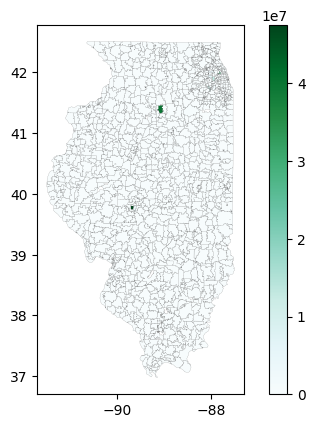

In [62]:
#######MAP of BEP Contract Values by ZIP







plt.figure(figsize=(100,100)) 
contr_vendor_bep_shape.plot(column='Dollars Spent to Date', legend=True, cmap='BuGn', linewidth=.08, edgecolor='0.2')
#plt.savefig('BEP_Contract_Values_by_Zip2IMPROVED.png', dpi=500)

In [63]:
#now we will map NON Bep

nonBEP_contr_vendor = contr_vendor_bep[contr_vendor_bep['clean_name_bep'].isna()]
nonBEP_contr_vendor

,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024,...,IL,60654,foleylardnerllp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,17-416CMS-BOSS4-P-99,NaN,JPMC PAPER AND ENVELOPES SMALL QTYS,Midland Paper,A,4502328.93,CMS - Central Management Services,3PS - Sent,03/06/2017,07/31/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,17-416CMS-BOSS4-P-39,NaN,MC Fleet Fuel Card Services,WEX BANK,B,279800.00,CMS - Central Management Services,3PS - Sent,07/01/2016,06/30/2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,14Z0879001,NaN,Pharmacy Benefits Management (PBMS),"Change Healthcare Pharmacy Solutions, Inc.",B,0.00,HFS - Healthcare and Family Services,3PS - Sent,03/17/2014,03/16/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,13Z1819001,NaN,HFS MMIS Upgrade Project Expert Services,Cognizant Technology Solutions US Corp,B,0.00,HFS - Healthcare and Family Services,3PS - Sent,06/20/2013,06/19/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#Cleaning zip codes
nonBEP_contr_vendor['Zip'] = nonBEP_contr_vendor['Zip'].str.replace('\t', '')

nonBEP_contr_vendor

/tmp/ipykernel_1942718/3678761518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonBEP_contr_vendor['Zip'] = nonBEP_contr_vendor['Zip'].str.replace('\t', '')


,Contract / Blanket #,Bid Solicitation #,Description,Vendor,Type Code,Dollars Spent to Date,Organization,Status,Begin Date,End Date,...,State_x,Zip,clean_name_vendor,Company Name_y,Address Type,Street,City_y,State_y,ZIP Code,clean_name_bep
0,CIB6354390,NaN,Prescription Drugs,"CaremarkPCS Health, L.L.C.",B,0.00,CMS - Central Management Services,3PS - Sent,07/01/2015,06/30/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIB5736630,NaN,ConnectYourCare - Flexible Spending,"ConnectYourCare, LLC",A,0.00,CMS - Central Management Services,3PS - Sent,07/01/2019,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-563WCC-WCC56-P-39787,NaN,Sole Source- WCRI CompScope Reports 23,WCRI,D,0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,08/15/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-563WCC-WCC56-P-38456,NaN,EDI Hosting and Maintenance FY 23,"Ebix, Inc.",C,0.00,WCC - Illinois Worker's Compensation Commission,3PS - Sent,07/01/2022,06/30/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-551HDA-LEGAL-P-39047,NaN,Foley & Lardner Bond Counsel (Exempt),FOLEY & LARDNER LLP,Z,0.00,HDA - Housing Development Authority,3PS - Sent,07/07/2022,07/06/2024,...,IL,60654,foleylardnerllp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,17-416CMS-BOSS4-P-99,NaN,JPMC PAPER AND ENVELOPES SMALL QTYS,Midland Paper,A,4502328.93,CMS - Central Management Services,3PS - Sent,03/06/2017,07/31/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1372,17-416CMS-BOSS4-P-39,NaN,MC Fleet Fuel Card Services,WEX BANK,B,279800.00,CMS - Central Management Services,3PS - Sent,07/01/2016,06/30/2025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1373,14Z0879001,NaN,Pharmacy Benefits Management (PBMS),"Change Healthcare Pharmacy Solutions, Inc.",B,0.00,HFS - Healthcare and Family Services,3PS - Sent,03/17/2014,03/16/2024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1374,13Z1819001,NaN,HFS MMIS Upgrade Project Expert Services,Cognizant Technology Solutions US Corp,B,0.00,HFS - Healthcare and Family Services,3PS - Sent,06/20/2013,06/19/2023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#aggregating nonBEP contracts values by Zip code

nonBEP_contr_vendor_value = nonBEP_contr_vendor.groupby('Zip')[['Dollars Spent to Date']].sum().reset_index()
nonBEP_contr_vendor_value.head()

,Zip,Dollars Spent to Date
0,60018,133475.82
1,60030,159776.65
2,60041,11173.00
3,60045,36238604.98
4,60048,0.00


In [66]:
#Changing zip code data type
nonBEP_contr_vendor_value['Zip'] = nonBEP_contr_vendor_value['Zip'].astype('int')
nonBEP_contr_vendor_value['Zip'].dtypes

dtype('int64')

In [67]:
len(nonBEP_contr_vendor_value['Zip'].unique())

121

In [68]:
contr_vendor_nonbep_shape = pd.merge(Zips_shapfile, nonBEP_contr_vendor_value, left_on = 'ZCTA5CE10', right_on = 'Zip', how='outer')
contr_vendor_nonbep_shape

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Zip,Dollars Spent to Date
0,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN
1,61414.0,8600000US61414,61414,131238242.0,0.0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN
2,62982.0,8600000US62982,62982,20175875.0,1552872.0,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN
3,60129.0,8600000US60129,60129,44329894.0,0.0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN
4,61839.0,8600000US61839,61839,86254139.0,0.0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN
...,...,...,...,...,...,...,...,...
1382,61956.0,8600000US61956,61956,87587994.0,68518.0,"POLYGON ((-88.21672 39.80623, -88.19779 39.806...",NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,None,60138.0,0.0
1384,NaN,NaN,NaN,NaN,NaN,None,60694.0,99225.0
1385,NaN,NaN,NaN,NaN,NaN,None,62651.0,0.0


In [69]:
contr_vendor_nonbep_shape.isnull().sum()

ZCTA5CE10                   4
AFFGEOID10                  4
GEOID10                     4
ALAND10                     4
AWATER10                    4
geometry                    4
Zip                      1266
Dollars Spent to Date    1266
dtype: int64

In [70]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

contr_vendor_nonbep_shape['Dollars Spent to Date'] = contr_vendor_nonbep_shape['Dollars Spent to Date'].fillna(0)

contr_vendor_nonbep_shape['Dollars Spent to Date'].nlargest()

655    1.201959e+08
561    4.944822e+07
615    3.718204e+07
261    3.623860e+07
149    3.392848e+07
Name: Dollars Spent to Date, dtype: float64

In [71]:
contr_vendor_nonbep_shape['Dollars Spent to Date'].max()

120195865.31

<Axes: >

<Figure size 10000x10000 with 0 Axes>

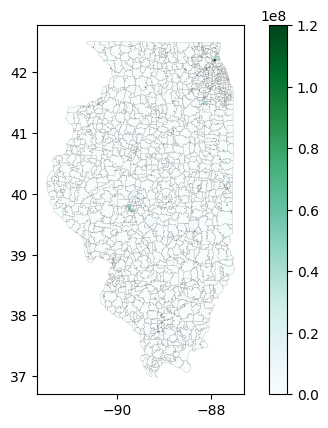

In [72]:
######MAP of NONBEP Contract VALUES by ZIP





plt.figure(figsize=(100,100)) 
contr_vendor_nonbep_shape.plot(column='Dollars Spent to Date', legend=True, cmap='BuGn', linewidth=.08, edgecolor='0.2')
#plt.savefig('NONBEP_Contract_Values_by_Zip2IMPROVED.png', dpi=500)

In [73]:
#Aggregating BEP contracts by zip code

bep_contr_zip_count = only_contr_bep.groupby('ZIP Code')[['Contract / Blanket #']].count().reset_index()
bep_contr_zip_count.shape

(56, 2)

In [74]:
contr_vendor_bep_count_shape = pd.merge(Zips_shapfile, bep_contr_zip_count, left_on = 'ZCTA5CE10', right_on = 'ZIP Code', how='outer')
contr_vendor_bep_count_shape

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,ZIP Code,Contract / Blanket #
0,60034,8600000US60034,60034,67280214,0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN
1,61414,8600000US61414,61414,131238242,0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN
2,62982,8600000US62982,62982,20175875,1552872,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN
3,60129,8600000US60129,60129,44329894,0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN
4,61839,8600000US61839,61839,86254139,0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN
...,...,...,...,...,...,...,...,...
1378,62218,8600000US62218,62218,119807091,575892,"POLYGON ((-89.57835 38.48485, -89.57401 38.483...",NaN,NaN
1379,61252,8600000US61252,61252,152882351,2014365,"POLYGON ((-90.20413 41.79631, -90.19591 41.798...",NaN,NaN
1380,61270,8600000US61270,61270,392873961,582693,"POLYGON ((-90.09315 41.88227, -90.09067 41.884...",NaN,NaN
1381,60523,8600000US60523,60523,23190737,857837,"MULTIPOLYGON (((-87.98229 41.84673, -87.97710 ...",NaN,NaN


In [75]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

contr_vendor_bep_count_shape['Contract / Blanket #'] = contr_vendor_bep_count_shape['Contract / Blanket #'].fillna(0)

contr_vendor_bep_count_shape['Contract / Blanket #'].nlargest()

211     17.0
921      9.0
694      7.0
1274     7.0
131      6.0
Name: Contract / Blanket #, dtype: float64

<Axes: >

<Figure size 10000x10000 with 0 Axes>

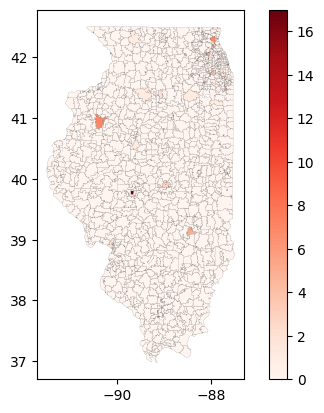

In [76]:
######MAP of BEP Award Contract COUNT by Zip




plt.figure(figsize=(100,100)) 
contr_vendor_bep_count_shape.plot(column='Contract / Blanket #', legend=True, cmap='Reds', linewidth=.08, edgecolor='0.2')
#plt.savefig('BEP_Contract_Count_by_Zip2IMPROVED.png', dpi=500)

In [77]:
#Aggregating NON BEP contracts by zip code

nonBEP_contr_vendor_count = nonBEP_contr_vendor.groupby('Zip')[['Contract / Blanket #']].count().reset_index()
nonBEP_contr_vendor_count.shape

(121, 2)

In [78]:
#Changing zip code data type
nonBEP_contr_vendor_count['Zip'] = nonBEP_contr_vendor_count['Zip'].astype('int')
nonBEP_contr_vendor_count['Zip'].dtypes

dtype('int64')

In [79]:
contr_vendor_nonbep_count_shape = pd.merge(Zips_shapfile, nonBEP_contr_vendor_count, left_on = 'ZCTA5CE10', right_on = 'Zip', how='outer')
contr_vendor_nonbep_count_shape

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,Zip,Contract / Blanket #
0,60034.0,8600000US60034,60034,67280214.0,0.0,"POLYGON ((-88.48181 42.49474, -88.46140 42.494...",NaN,NaN
1,61414.0,8600000US61414,61414,131238242.0,0.0,"POLYGON ((-90.24813 41.14501, -90.24315 41.145...",NaN,NaN
2,62982.0,8600000US62982,62982,20175875.0,1552872.0,"POLYGON ((-88.39697 37.43801, -88.39022 37.437...",NaN,NaN
3,60129.0,8600000US60129,60129,44329894.0,0.0,"POLYGON ((-89.00073 42.02189, -88.98602 42.022...",NaN,NaN
4,61839.0,8600000US61839,61839,86254139.0,0.0,"POLYGON ((-88.68799 40.14227, -88.65301 40.185...",NaN,NaN
...,...,...,...,...,...,...,...,...
1382,61956.0,8600000US61956,61956,87587994.0,68518.0,"POLYGON ((-88.21672 39.80623, -88.19779 39.806...",NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,None,60138.0,1.0
1384,NaN,NaN,NaN,NaN,NaN,None,60694.0,1.0
1385,NaN,NaN,NaN,NaN,NaN,None,62651.0,2.0


In [80]:
#here we fill in NAN values inside our Count column to 0's
#we also verify that it worked

contr_vendor_nonbep_count_shape['Contract / Blanket #'] = contr_vendor_nonbep_count_shape['Contract / Blanket #'].fillna(0)

contr_vendor_nonbep_count_shape['Contract / Blanket #'].nlargest()

1077    41.0
515     34.0
561     16.0
1051    14.0
563     12.0
Name: Contract / Blanket #, dtype: float64

<Axes: >

<Figure size 10000x10000 with 0 Axes>

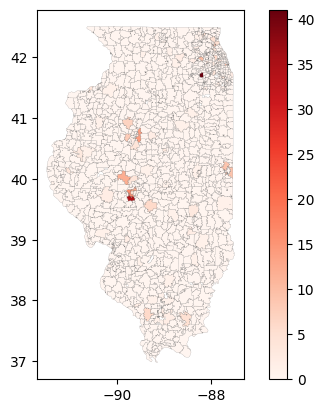

In [81]:
######MAP of NON BEP Award Contract COUNT by Zip




plt.figure(figsize=(100,100)) 
contr_vendor_nonbep_count_shape.plot(column='Contract / Blanket #', legend=True, cmap='Reds', linewidth=.08, edgecolor='0.2')
#plt.savefig('NONBEP_Contract_Count_by_Zip2IMPROVED.png', dpi=500)